In [23]:
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline

# Return Forecasting: Read Historical Daily Yen Futures Data
In this notebook, you will load historical Dollar-Yen exchange rate futures data and apply time series analysis and modeling to determine whether there is any predictable behavior.

In [87]:
# Futures contract on the Yen-dollar exchange rate:
# This is the continuous chain of the futures contracts that are 1 month to expiration
yen_futures = pd.read_csv(
    Path("yen.csv"), index_col="Date", infer_datetime_format=True, parse_dates=True
)
yen_futures.index = pd.to_datetime(yen_futures.index, format="%Y-%m-%d")
yen_futures.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
1976-08-02,3398.0,3401.0,3398.0,3401.0,NaN,3401.0,2.0,1.0
1976-08-03,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-04,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-05,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-06,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0


In [25]:
# Trim the dataset to begin on January 1st, 1990
yen_futures = yen_futures.loc["1989-01-01":, :]
yen_futures.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
1989-01-03,8160.0,8187.0,8141.0,8149.0,NaN,8149.0,33969.0,31908.0
1989-01-04,8090.0,8098.0,8059.0,8085.0,NaN,8085.0,32081.0,30342.0
1989-01-05,8055.0,8056.0,8003.0,8009.0,NaN,8009.0,33147.0,30454.0
1989-01-06,7977.0,7992.0,7950.0,7967.0,NaN,7967.0,29530.0,33751.0
1989-01-09,7970.0,8021.0,7961.0,8018.0,NaN,8018.0,26426.0,33066.0


 # Return Forecasting: Initial Time-Series Plotting

 Start by plotting the "Settle" price. Do you see any patterns, long-term and/or short?

<AxesSubplot:xlabel='Date'>

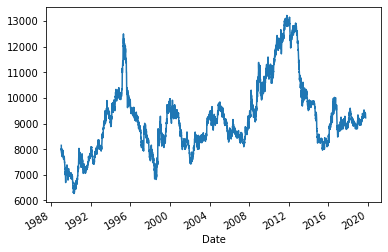

In [26]:
# Plot just the "Settle" column from the dataframe:
# YOUR CODE HERE!
yen_futures['Settle'].plot()

---

# Decomposition Using a Hodrick-Prescott Filter

 Using a Hodrick-Prescott Filter, decompose the Settle price into a trend and noise.

In [27]:
import statsmodels.api as sm

# Apply the Hodrick-Prescott Filter by decomposing the "Settle" price into two separate series:
# YOUR CODE HERE!
yen_noise, yen_trend = sm.tsa.filters.hpfilter(yen_futures['Settle'])

In [28]:
# Create a dataframe of just the settle price, and add columns for "noise" and "trend" series from above:
# YOUR CODE HERE!
yen_df = yen_futures.drop(columns=['Open','High','Low','Last','Change','Volume','Previous Day Open Interest'])
yen_df['Noise'] = yen_noise
yen_df['Trend'] = yen_trend
yen_df.head()

,Settle,Noise,Trend
Date,,,
1989-01-03,8149.0,88.552449,8060.447551
1989-01-04,8085.0,41.276819,8043.723181
1989-01-05,8009.0,-18.054156,8027.054156
1989-01-06,7967.0,-43.521621,8010.521621
1989-01-09,8018.0,23.804567,7994.195433


<AxesSubplot:xlabel='Date'>

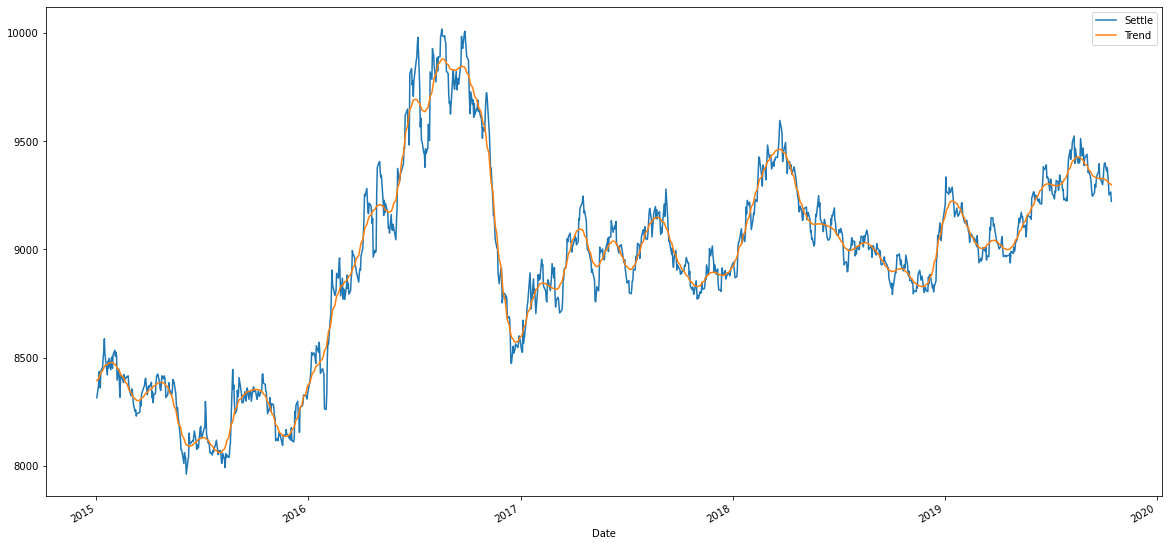

In [29]:
# Plot the Settle Price vs. the Trend for 2015 to the present
# YOUR CODE HERE!
yen_df[['Settle','Trend']].loc['2015-01-01':,:].plot(figsize=[20,10])

<AxesSubplot:xlabel='Date'>

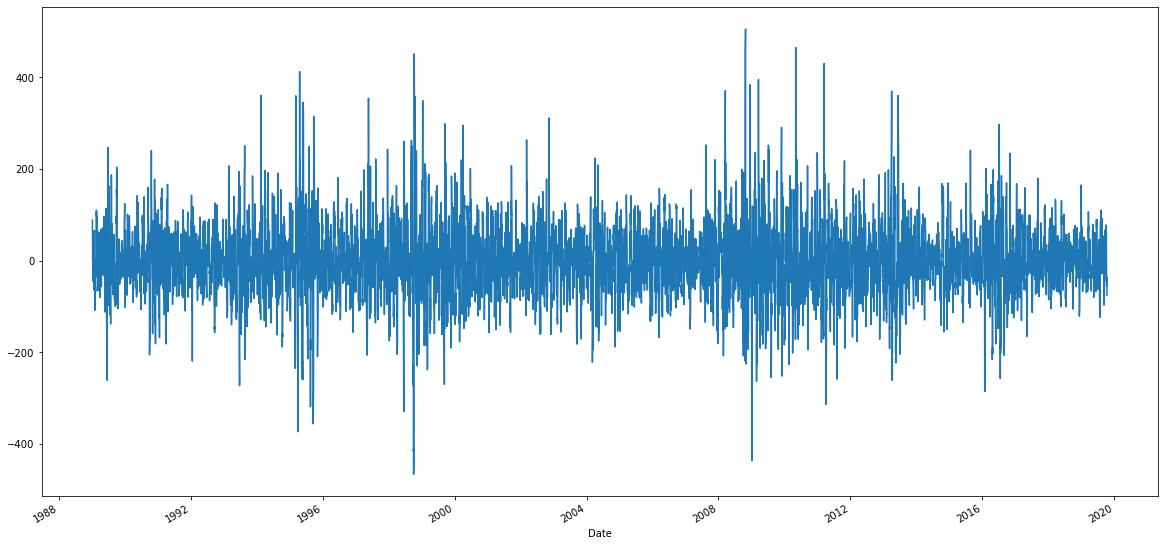

In [30]:
# Plot the Settle Noise
# YOUR CODE HERE!
yen_df['Noise'].plot(figsize=[20,10])

---

# Forecasting Returns using an ARMA Model

Using futures Settle *Returns*, estimate an ARMA model

1. ARMA: Create an ARMA model and fit it to the returns data. Note: Set the AR and MA ("p" and "q") parameters to p=2 and q=1: order=(2, 1).
2. Output the ARMA summary table and take note of the p-values of the lags. Based on the p-values, is the model a good fit (p < 0.05)?
3. Plot the 5-day forecast of the forecasted returns (the results forecast from ARMA model)

In [31]:
# Create a series using "Settle" price percentage returns, drop any nan"s, and check the results:
# (Make sure to multiply the pct_change() results by 100)
# In this case, you may have to replace inf, -inf values with np.nan"s
returns = (yen_futures[["Settle"]].pct_change() * 100)
returns = returns.replace(-np.inf, np.nan).dropna()
returns.tail()

,Settle
Date,
2019-10-09,-0.410601
2019-10-10,-0.369458
2019-10-11,-0.564304
2019-10-14,0.151335
2019-10-15,-0.469509


In [35]:
from statsmodels.tsa.arima_model import ARMA

# Estimate and ARMA model using statsmodels (use order=(2, 1))
# YOUR CODE HERE!
model = ARMA(returns.values, order=(2,1))
# Fit the model and assign it to a variable called results
# YOUR CODE HERE!
results = model.fit()

/Users/julianlopez/anaconda3/envs/dev/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [36]:
# Output model summary results:
# YOUR CODE HERE!
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 7766
Model:                     ARMA(2, 1)   Log Likelihood               -8170.868
Method:                       css-mle   S.D. of innovations              0.693
Date:                Mon, 14 Jun 2021   AIC                          16351.736
Time:                        19:54:41   BIC                          16386.523
Sample:                             0   HQIC                         16363.661
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0040      0.008      0.531      0.596      -0.011       0.019
ar.L1.y        0.7106      0.193      3.686      0.000       0.333       1.089
ar.L2.y       -0.0031      0.012     -0.257      0.797      -0.027       0.021
ma.L1.y       -0.7195      0.192     -3.738      0.000      -1.097      -0.342
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4160           +0.0000j            1.4160            0.0000
AR.2          226.0780           +0.0000j          226.0780            0.0000
MA.1            1.3899           +0.0000j            1.3899            0.0000
-----------------------------------------------------------------------------
"""

<AxesSubplot:title={'center':'Stock Return Forecast'}>

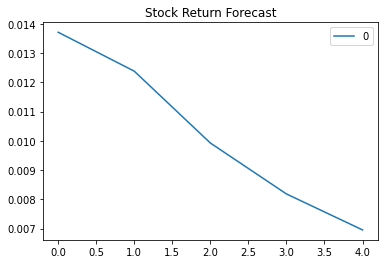

In [37]:
# Plot the 5 Day Returns Forecast
# YOUR CODE HERE!
pd.DataFrame(results.forecast(steps=5)[0]).plot(title="Stock Return Forecast")

---

# Forecasting the Settle Price using an ARIMA Model

 1. Using the *raw* Yen **Settle Price**, estimate an ARIMA model.
     1. Set P=5, D=1, and Q=1 in the model (e.g., ARIMA(df, order=(5,1,1))
     2. P= # of Auto-Regressive Lags, D= # of Differences (this is usually =1), Q= # of Moving Average Lags
 2. Output the ARIMA summary table and take note of the p-values of the lags. Based on the p-values, is the model a good fit (p < 0.05)?
 3. Construct a 5 day forecast for the Settle Price. What does the model forecast will happen to the Japanese Yen in the near term?

In [90]:
from statsmodels.tsa.arima.model import ARIMA

# Estimate and ARIMA Model:
# Hint: ARIMA(df, order=(p, d, q))
# YOUR CODE HERE!
model = ARIMA(yen_futures['Settle'], order=(5, 1, 1))
# Fit the model
# YOUR CODE HERE!
arima_results = model.fit()

/Users/julianlopez/anaconda3/envs/dev/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/julianlopez/anaconda3/envs/dev/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/julianlopez/anaconda3/envs/dev/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [91]:
# Output model summary results:
arima_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Settle   No. Observations:                10902
Model:                 ARIMA(5, 1, 1)   Log Likelihood              -59615.147
Date:                Mon, 14 Jun 2021   AIC                         119244.294
Time:                        20:20:07   BIC                         119295.370
Sample:                             0   HQIC                        119261.509
                              - 10902                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0051      1.372     -0.004      0.997      -2.693       2.683
ar.L2         -0.0049      0.016     -0.309      0.757      -0.036       0.026
ar.L3         -0.0071      0.010     -0.709      0.478      -0.027       0.013
ar.L4         -0.0149      0.013     -1.177      0.239      -0.040       0.010
ar.L5         -0.0050      0.021     -0.234      0.815      -0.047       0.037
ma.L1         -0.0052      1.372     -0.004      0.997      -2.693       2.683
sigma2      3295.2226     20.596    159.997      0.000    3254.856    3335.589
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             28417.95
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               2.64   Skew:                             0.38
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/Users/julianlopez/anaconda3/envs/dev/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


<AxesSubplot:title={'center':'Yen Settle Price Forecast'}>

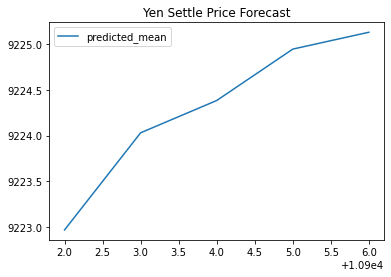

In [92]:
# Plot the 5 Day Price Forecast
# YOUR CODE HERE!
pd.DataFrame(arima_results.forecast(steps=5)).plot(title="Yen Settle Price Forecast")

---

# Volatility Forecasting with GARCH

Rather than predicting returns, let's forecast near-term **volatility** of Japanese Yen futures returns. Being able to accurately predict volatility will be extremely useful if we want to trade in derivatives or quantify our maximum loss.
 
Using futures Settle *Returns*, estimate an GARCH model

1. GARCH: Create an GARCH model and fit it to the returns data. Note: Set the parameters to p=2 and q=1: order=(2, 1).
2. Output the GARCH summary table and take note of the p-values of the lags. Based on the p-values, is the model a good fit (p < 0.05)?
3. Plot the 5-day forecast of the volatility.

In [47]:
from arch import arch_model

In [48]:
# Estimate a GARCH model:
# YOUR CODE HERE!
model = arch_model(returns, mean="Zero", vol="GARCH", p=2, q=1)
# Fit the model
# YOUR CODE HERE!
res = model.fit(disp="off")

In [49]:
# Summarize the model results
# YOUR CODE HERE!
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                 Settle   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -7729.60
Distribution:                  Normal   AIC:                           15467.2
Method:            Maximum Likelihood   BIC:                           15495.0
                                        No. Observations:                 7766
Date:                Mon, Jun 14 2021   Df Residuals:                     7766
Time:                        19:56:45   Df Model:                            0
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      4.9328e-03  2.377e-03      2.075  3.795e-02  [2.743e-04,9.591e-03]
alpha[1]       0.0409  1.341e-02      3.047  2.313e-03  [1.457e-02,6.714e-02]
alpha[2]       0.0000  1.810e-02      0.000      1.000 [-3.548e-02,3.548e-02]
beta[1]        0.9496  1.572e-02     60.421      0.000      [  0.919,  0.980]
=============================================================================

Covariance estimator: robust
"""

In [50]:
# Find the last day of the dataset
last_day = returns.index.max().strftime('%Y-%m-%d')
last_day

'2019-10-15'

In [101]:
# Create a 5 day forecast of volatility
forecast_horizon = 5
# Start the forecast using the last_day calculated above
# YOUR CODE HERE!
forecasts = res.forecast(start=last_day, horizon=forecast_horizon, reindex=True)

In [102]:
# Annualize the forecast
intermediate = np.sqrt(forecasts.variance.dropna() * 252)
intermediate

,h.1,h.2,h.3,h.4,h.5
Date,,,,,
2019-10-15,7.467504,7.515045,7.561838,7.607902,7.653255


In [103]:
# Transpose the forecast so that it is easier to plot
final = intermediate.dropna().T
final.head()

Date,2019-10-15
h.1,7.467504
h.2,7.515045
h.3,7.561838
h.4,7.607902
h.5,7.653255


<AxesSubplot:>

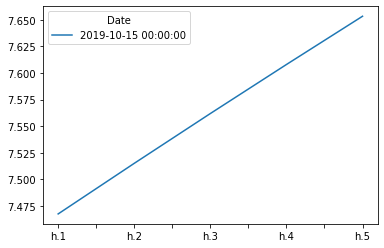

In [104]:
# Plot the final forecast
# YOUR CODE HERE!
final.plot()

---

# Conclusions

Based on your time series analysis, would you buy the yen now?

These models are inconclusive, but it seems risk will raise over the next 5 days.

Is the risk of the yen expected to increase or decrease?

Increase.

Based on the model evaluation, would you feel confident in using these models for trading?

Only the GARCH.